# 4.10 Task Part 1 (notebook 9)

## Table of Contents
### 4.10 Task Part 1 -- Question 8 continued (compare customer profiles with regions and departments)
### Bar chart for age vs. alcohol orders normalized by age range
### Bar chart for income vs. alcohol orders normalized by income level
### Bar chart for total orders for the alcohol department normalized by those with and without dependents
### Horizontal bar chart showing customer profiles against the alcohol department normalized by customer profiles
### Stacked bar chart showing total alcohol sales by 'age_range' and 'income_flag' (normalized)
### Grouped bar chart showing the loyalty status distribution for each age range.
### Grouped bar chart showing the loyalty flag for age and dependents status
### Rerunning Total orders for the alcohol department normalized by those with and without dependents with updated code

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Creating path

path = r'C:\Users\Karen\Documents\Personal\Data Analytics\Career Foundry\Achievement 4\Instacart Basket Analysis'

In [4]:
# Importing data set

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [5]:
# Removing the limit to columns and rows displayed so I can see all the rows and columns going forward

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
# Checking data frame

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order_price,spending_flag,median_days_since_prior_order,regularity_flag,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag,age_range,department,order_total,income_flag,customer_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,31.6,below average,"young, below average income, has dependents"
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,35.4,below average,"young, below average income, has dependents"
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,28.2,below average,"young, below average income, has dependents"
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,26.0,below average,"young, below average income, has dependents"
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,57.0,below average,"young, below average income, has dependents"


In [6]:
df.shape

(30964564, 38)

## 8. (CONTINUED) Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

## In this notebook, I will continue to look at customer profiles against other departments, such as 'alcohol.' 

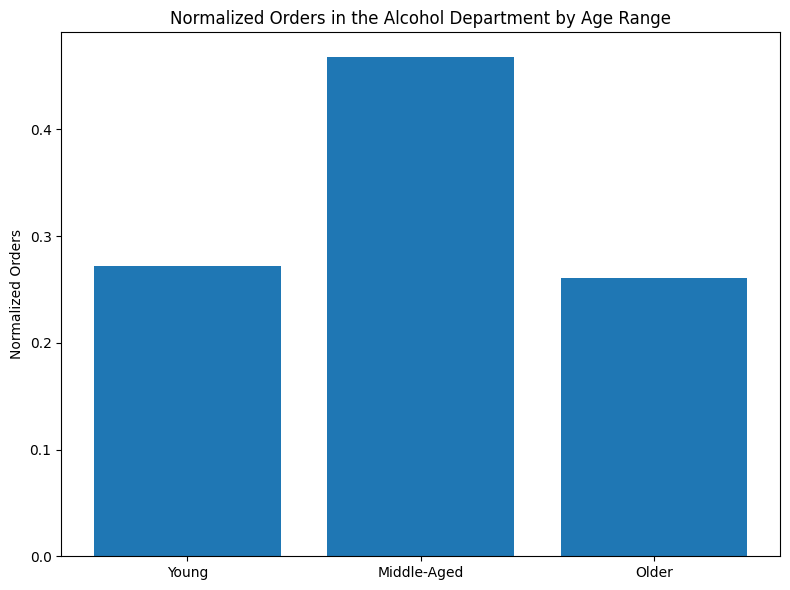

In [10]:
# Bar chart for age vs. alcohol orders normalized by age range

# Filter the data for the 'alcohol' department
alcohol_data = df[df['department'] == 'alcohol']

# Count the total orders in the 'alcohol' department
total_orders_alcohol = alcohol_data['order_id'].nunique()

# Count the unique orders for each age range in the 'alcohol' department
orders_young = alcohol_data[alcohol_data['age_range'] == 'Young']['order_id'].nunique()
orders_middle = alcohol_data[alcohol_data['age_range'] == 'Middle-Aged']['order_id'].nunique()
orders_older = alcohol_data[alcohol_data['age_range'] == 'Older']['order_id'].nunique()

# Normalize the number of orders by the total count of orders in the 'alcohol' department
normalized_orders = [orders_young / total_orders_alcohol, 
                      orders_middle / total_orders_alcohol, 
                      orders_older / total_orders_alcohol]

# Create a vertical bar chart
labels = ['Young', 'Middle-Aged', 'Older']
heights = normalized_orders

plt.figure(figsize=(8, 6))
plt.bar(labels, heights)
plt.ylabel('Normalized Orders')
plt.xlabel('')
plt.title('Normalized Orders in the Alcohol Department by Age Range')

plt.tight_layout()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'alcohol_orders_age_normalized.png'), bbox_inches='tight', pad_inches=0.1)

plt.show()


In [11]:
normalized_orders

[0.2722114117130124, 0.46746594689598897, 0.2603226413909987]

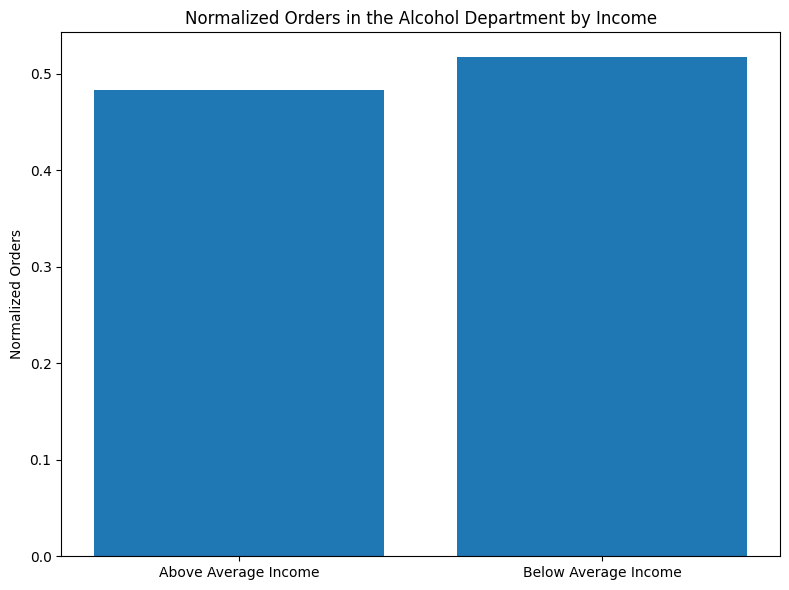

In [12]:
# Bar chart for income vs. alcohol orders normalized by income level

# Filter the data for the 'alcohol' department
alcohol_data = df[df['department'] == 'alcohol']

# Count the total orders in the 'alcohol' department
total_orders_alcohol = alcohol_data['order_id'].nunique()

# Count the unique orders for 'above average' and 'below average' customer income in the 'alcohol' department
orders_above = alcohol_data[alcohol_data['income_flag'] == 'above average']['order_id'].nunique()
orders_below = alcohol_data[alcohol_data['income_flag'] == 'below average']['order_id'].nunique()

# Normalize the number of orders by the total count of orders in the 'alcohol' department
normalized_orders = [orders_above / total_orders_alcohol, orders_below / total_orders_alcohol]

# Create a vertical bar chart
labels = ['Above Average Income', 'Below Average Income']
heights = normalized_orders

plt.figure(figsize=(8, 6))
plt.bar(labels, heights)
plt.ylabel('Normalized Orders')
plt.xlabel('')
plt.title('Normalized Orders in the Alcohol Department by Income')

plt.tight_layout()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'alcohol_orders_by_income_normalized.png'), bbox_inches='tight', pad_inches=0.1)

plt.show()



In [13]:
normalized_orders

[0.48308329671709244, 0.5169167032829075]

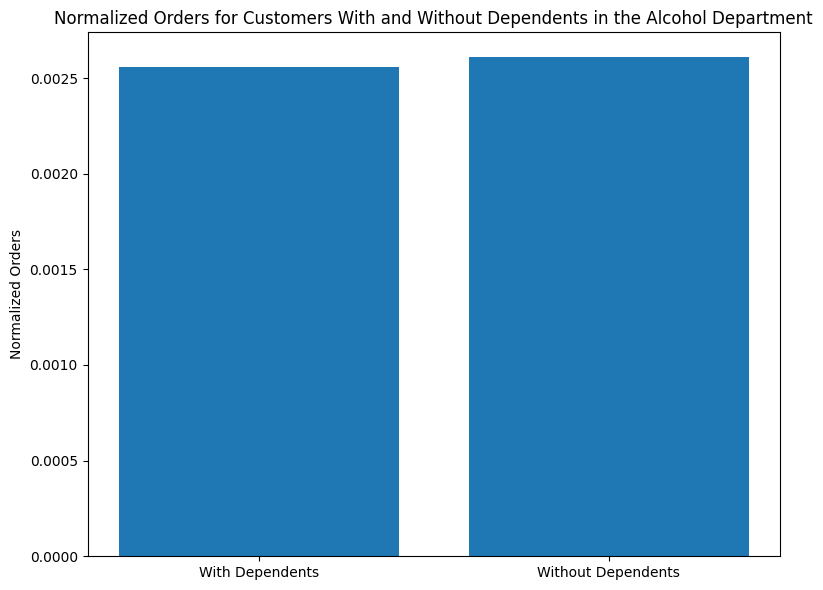

In [17]:
# Bar chart for total orders for the alcohol department normalized by those with and without dependents

# Filter the data for the 'alcohol' department
alcohol_data = df[df['department'] == 'alcohol']

# Count the unique orders for customers with and without dependents in the 'alcohol' department
orders_with_dependents = alcohol_data[alcohol_data['number_of_dependents'] > 0]['order_id'].nunique()
orders_without_dependents = alcohol_data[alcohol_data['number_of_dependents'] == 0]['order_id'].nunique()

# Calculate the total count of customers with and without dependents
total_customers_with_dependents = df[df['number_of_dependents'] > 0]['order_id'].nunique()
total_customers_without_dependents = df[df['number_of_dependents'] == 0]['order_id'].nunique()

# Normalize the number of orders by the total count of customers with and without dependents
normalized_orders_with = orders_with_dependents / total_customers_with_dependents
normalized_orders_without = orders_without_dependents / total_customers_without_dependents

# Create a vertical bar chart
labels = ['With Dependents', 'Without Dependents']
heights = [normalized_orders_with, normalized_orders_without]

plt.figure(figsize=(8, 6))
plt.bar(labels, heights)
plt.ylabel('Normalized Orders')
plt.xlabel('')
plt.title('Normalized Orders for Customers With and Without Dependents in the Alcohol Department')

plt.tight_layout()
plt.show()


In [15]:
normalized_orders_with

0.0025604004119202666

In [16]:
normalized_orders_without

0.0026086346452780158

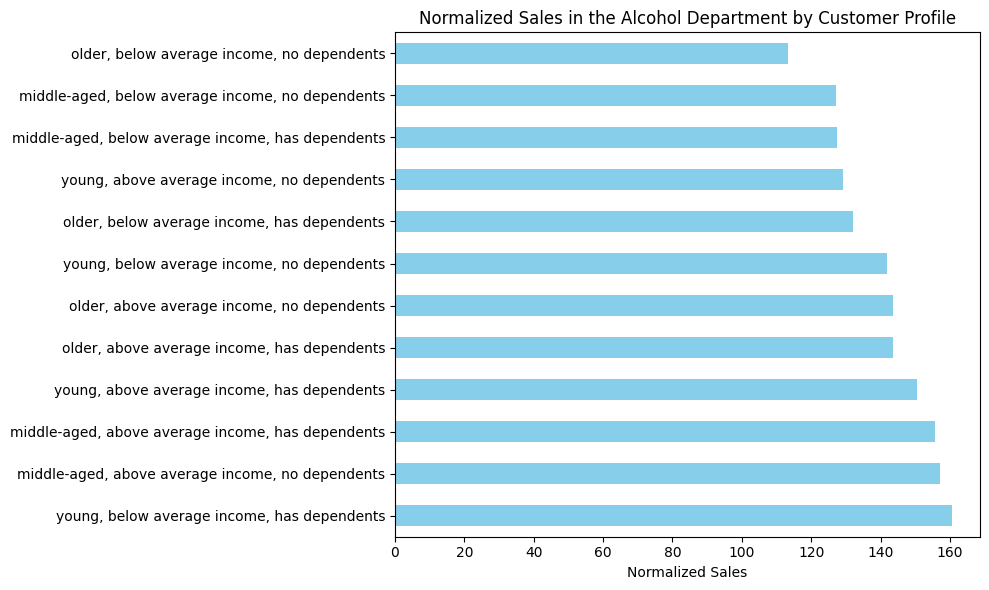

In [18]:
# Horizontal bar chart showing customer profiles against the alcohol department normalized by customer profiles

# Filter the data for the 'alcohol' department
alcohol_data = df[df['department'] == 'alcohol']

# Merge order_total with the alcohol_data
alcohol_sales = alcohol_data.groupby(['order_id', 'customer_profile'])['order_total'].sum().reset_index()

# Calculate the total sales for each customer profile in the 'alcohol' department
sales_by_profile = alcohol_sales.groupby('customer_profile')['order_total'].sum()

# Count the unique customers for each profile in the 'alcohol' department
customers_by_profile = alcohol_sales['customer_profile'].value_counts()

# Normalize the total sales by the number of customers in each profile
normalized_sales = sales_by_profile / customers_by_profile

# Sort the normalized sales from the largest to smallest
normalized_sales_sorted = normalized_sales.sort_values(ascending=False)

# Create a horizontal bar chart for normalized sales by customer profile
plt.figure(figsize=(10, 6))
normalized_sales_sorted.plot(kind='barh', color='skyblue')
plt.xlabel('Normalized Sales')
plt.ylabel('')
plt.title('Normalized Sales in the Alcohol Department by Customer Profile')

plt.tight_layout()
plt.show()


In [19]:
normalized_sales_sorted

customer_profile
young, below average income, has dependents          160.616117
middle-aged, above average income, no dependents     157.005506
middle-aged, above average income, has dependents    155.805091
young, above average income, has dependents          150.608798
older, above average income, has dependents          143.646701
older, above average income, no dependents           143.449365
young, below average income, no dependents           141.759950
older, below average income, has dependents          131.996182
young, above average income, no dependents           129.081004
middle-aged, below average income, has dependents    127.462688
middle-aged, below average income, no dependents     127.138177
older, below average income, no dependents           113.395696
dtype: float64

<Figure size 1000x800 with 0 Axes>

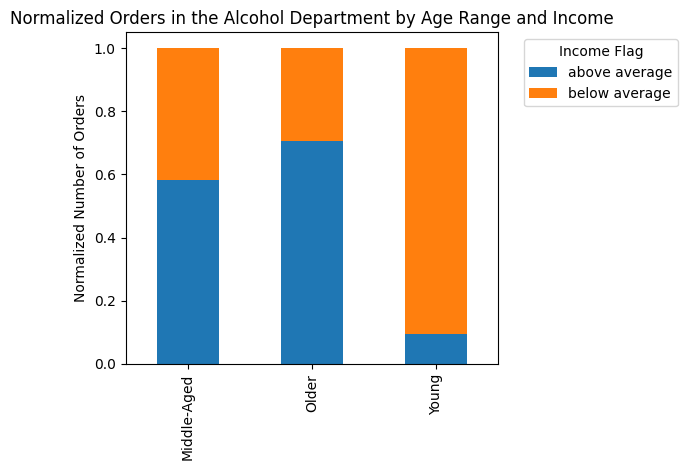

In [24]:
# Stacked bar chart showing total alcohol sales by 'age_range' and 'income_flag' (normalized)

# Filter the data for the 'alcohol' department
alcohol_data = df[df['department'] == 'alcohol']

# Grouping the data by 'age_range' and 'income_flag' and counting unique orders
grouped_data = alcohol_data.groupby(['age_range', 'income_flag'])['order_id'].nunique().unstack(fill_value=0)

# Calculating the total number of orders for each age range and income flag
total_orders_by_age_income = grouped_data.sum(axis=1)

# Normalizing the grouped data by dividing by the total number of orders within each group
normalized_grouped_data = grouped_data.div(total_orders_by_age_income, axis=0)

# Creating a stacked vertial bar chart for normalized data
plt.figure(figsize=(10, 8))
normalized_grouped_data.plot(kind='bar', stacked=True) 
plt.xlabel('')
plt.ylabel('Normalized Number of Orders')
plt.title('Normalized Orders in the Alcohol Department by Age Range and Income')

plt.legend(title='Income Flag', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'alcohol_orders_by_age_income_normalized.png'), bbox_inches='tight', pad_inches=0.1)

plt.show()


In [21]:
normalized_grouped_data

income_flag,above average,below average
age_range,,
Middle-Aged,0.583682,0.416318
Older,0.707224,0.292776
Young,0.095974,0.904026


## Now I'd like to revisit a question from the project brief: Is there a connection between age and family status in terms of ordering habits?
### I will used the number_of_dependents to determine family status, not marrital status because I have not found marrital status to have much if any effect on order habits.

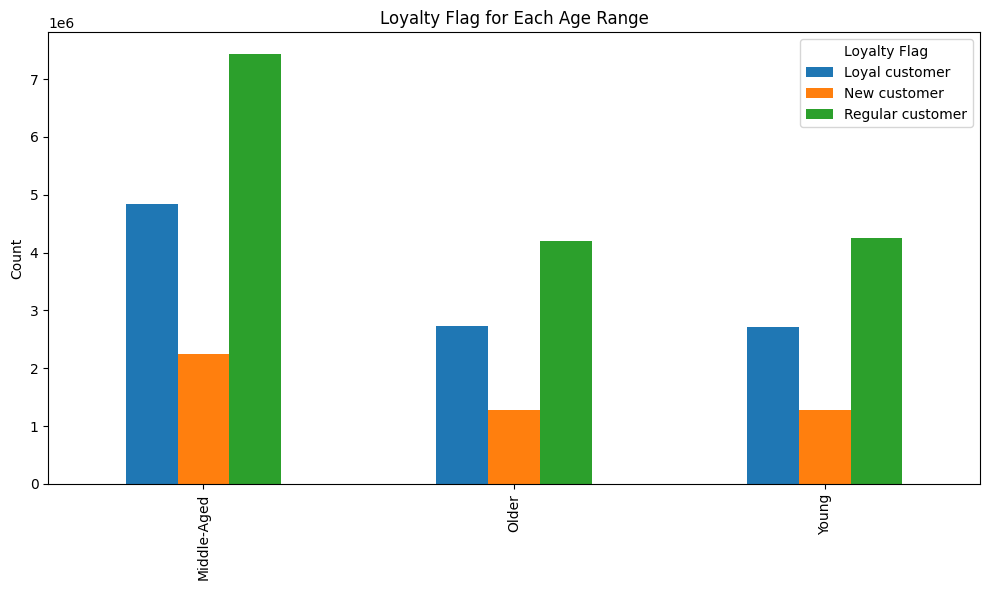

In [27]:
# Create a vertical, grouped bar chart showing the loyalty status distribution for each age range.

# Group data by 'age_range' and 'loyalty_flag' and count occurrences
grouped = df.groupby(['age_range', 'loyalty_flag']).size().unstack()

# Plotting the grouped bar chart
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Loyalty Flag for Each Age Range')
plt.xlabel('')
plt.ylabel('Count')
plt.legend(title='Loyalty Flag')

plt.tight_layout()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_age.png'), bbox_inches='tight', pad_inches=0.1)

plt.show()


In [28]:
grouped

loyalty_flag,Loyal customer,New customer,Regular customer
age_range,,,
Middle-Aged,4844731,2245396,7436598
Older,2723958,1276659,4194927
Young,2715404,1281640,4245251


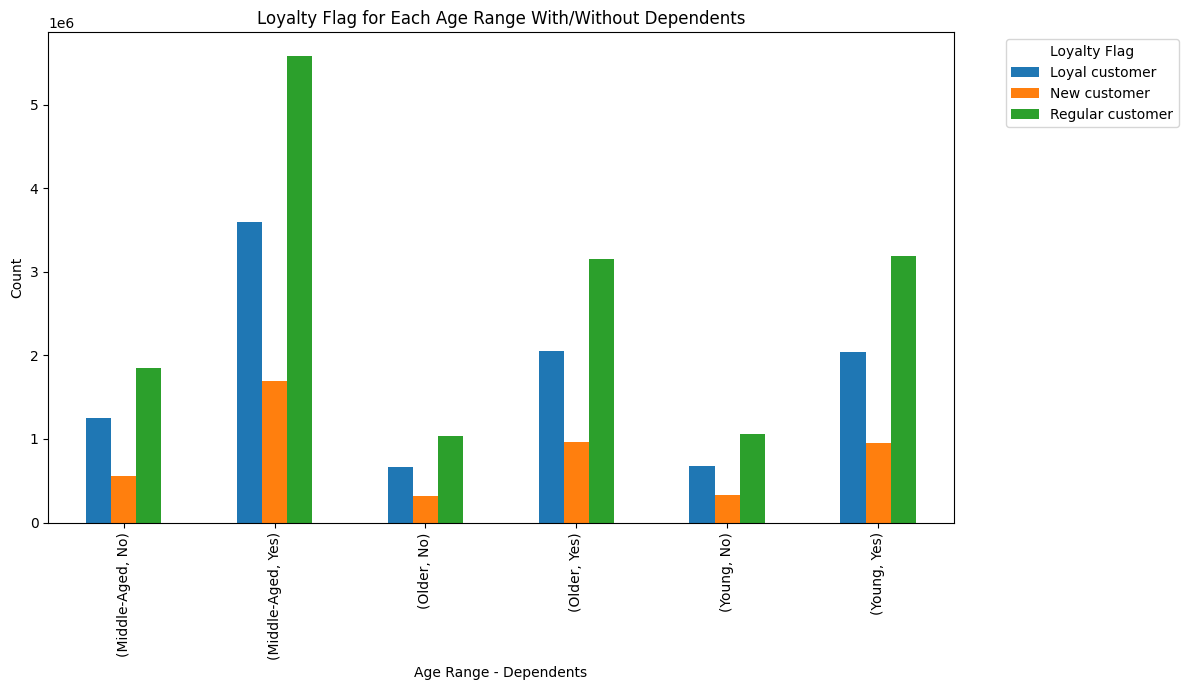

In [31]:
# Create a grouped bar chart showing the loyalty flag for age and dependents status.

# Group data by 'age_range', 'number_of_dependents' condition, and 'loyalty_flag', count occurrences
grouped = df.groupby(['age_range', df['number_of_dependents'].apply(lambda x: 'Yes' if x > 0 else 'No'), 'loyalty_flag']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
grouped.plot(kind='bar', figsize=(12, 7))
plt.title('Loyalty Flag for Each Age Range With/Without Dependents')
plt.xlabel('Age Range - Dependents')
plt.ylabel('Count')
plt.legend(title='Loyalty Flag', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_age_dependents.png'), bbox_inches='tight', pad_inches=0.1)


plt.show()


In [30]:
grouped

loyalty_flag                      Loyal customer  New customer  \
age_range   number_of_dependents                                 
Middle-Aged No                           1248799        553262   
            Yes                          3595932       1692134   
Older       No                            667927        316341   
            Yes                          2056031        960318   
Young       No                            672118        331662   
            Yes                          2043286        949978   

loyalty_flag                      Regular customer  
age_range   number_of_dependents                    
Middle-Aged No                             1852104  
            Yes                            5584494  
Older       No                             1037690  
            Yes                            3157237  
Young       No                             1059778  
            Yes                            3185473

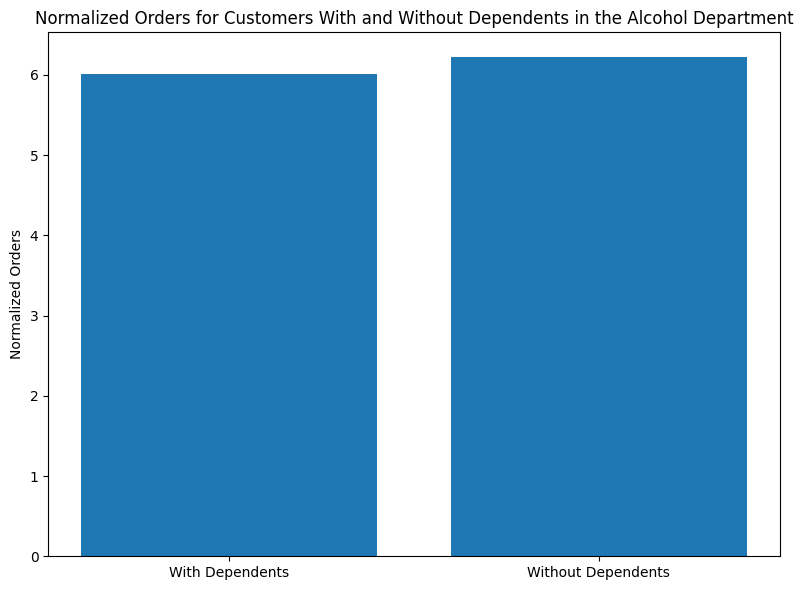

In [6]:
# Rerunning Total orders for the alcohol department normalized by those with and without dependents
# with updated code.

# Filter the data for the 'alcohol' department
alcohol_data = df[df['department'] == 'alcohol']

# Count the unique orders for customers with and without dependents in the 'alcohol' department
orders_with_dependents = alcohol_data[alcohol_data['number_of_dependents'] > 0]['order_id'].nunique()
orders_without_dependents = alcohol_data[alcohol_data['number_of_dependents'] == 0]['order_id'].nunique()

# Calculate the total count of customers with and without dependents
total_alcohol_customers_with_dependents = alcohol_data[alcohol_data['number_of_dependents'] > 0]['user_id'].nunique()
total_alcohol_customers_without_dependents = alcohol_data[alcohol_data['number_of_dependents'] == 0]['user_id'].nunique()

# Normalize the number of orders by the total count of customers with and without dependents
normalized_orders_with = orders_with_dependents / total_alcohol_customers_with_dependents
normalized_orders_without = orders_without_dependents / total_alcohol_customers_without_dependents

# Create a vertical bar chart
labels = ['With Dependents', 'Without Dependents']
heights = [normalized_orders_with, normalized_orders_without]

plt.figure(figsize=(8, 6))
plt.bar(labels, heights)
plt.ylabel('Normalized Orders')
plt.xlabel('')
plt.title('Normalized Orders for Customers With and Without Dependents in the Alcohol Department')

plt.tight_layout()
plt.show()


In [7]:
normalized_orders_with

6.004139741518578

In [8]:
normalized_orders_without

6.218047428395442

### Very similar to original results